In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [71]:
data = pd.read_csv('../data/processed/uber_data_transformed.csv') 
# print(data.head())

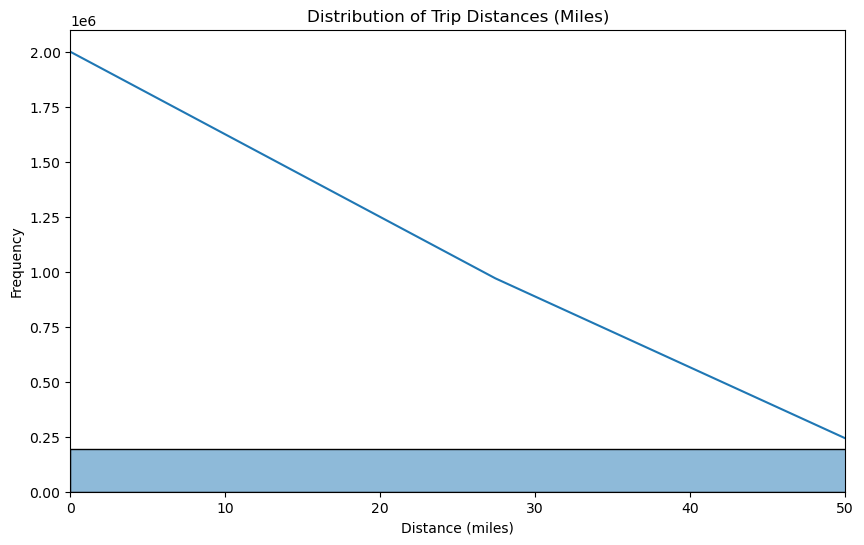

count    194335.000000
mean         13.091592
std         238.659756
min           0.000052
25%           0.796491
50%           1.357290
75%           2.460527
max        5457.446199
Name: trip_distance_miles, dtype: float64


In [72]:
filtered_data = data[(data['trip_distance_miles'] > 0) & (data['fare_amount'] > 0)]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['trip_distance_miles'], bins=10, kde=True)
plt.title('Distribution of Trip Distances (Miles)')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.xlim(left=0, right=50)
plt.ylim(bottom=0)
plt.show()
data.head(500)
print(filtered_data['trip_distance_miles'].describe())

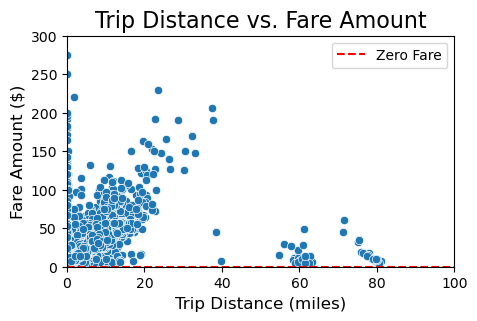

In [73]:
filtered_data = data[(data['trip_distance_miles'] > 0) & (data['fare_amount'] > 0)]
plt.figure(figsize=(5, 3))
sns.scatterplot(x='trip_distance_miles', y='fare_amount', data=data)
plt.title('Trip Distance vs. Fare Amount', fontsize=16)
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.xlim(left=0, right=100)
plt.ylim(bottom=0, top=300)
plt.axhline(0, color='red', linestyle='--', label='Zero Fare')
plt.legend()
plt.show()

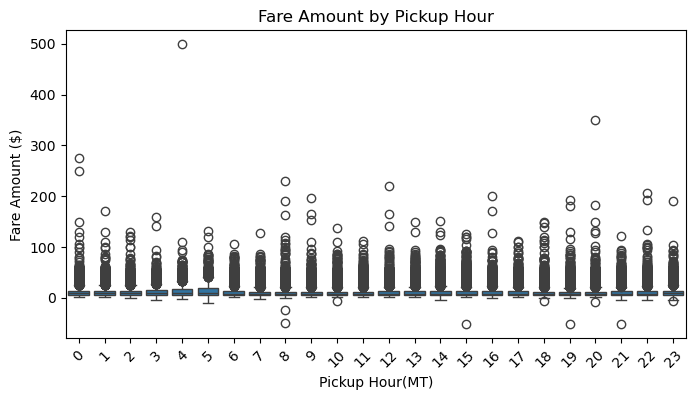

In [74]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='pickup_hour', y='fare_amount', data=data)
plt.title('Fare Amount by Pickup Hour')
plt.xlabel('Pickup Hour(MT)')
plt.ylabel('Fare Amount ($)')
plt.xticks(rotation=45)
plt.show()

/opt/anaconda3/envs/project-1-env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


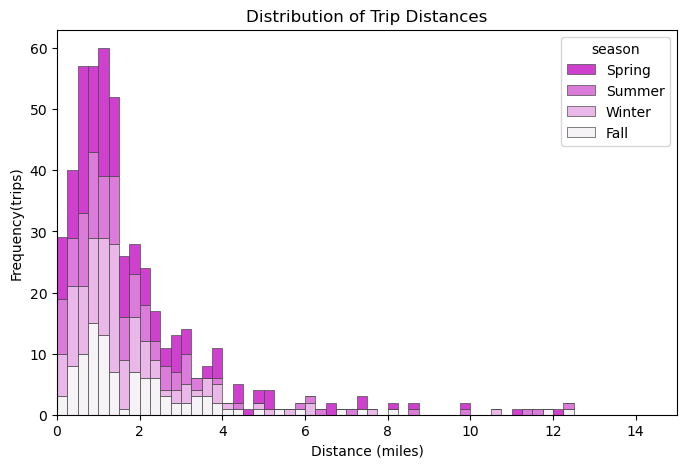

In [75]:
# Histogram 
plt.figure(figsize=(8, 5))
sns.histplot(data = data.head(500), x = 'trip_distance_miles', 
    binwidth= .25,
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5, hue="season",
    multiple="stack",)
plt.title('Distribution of Trip Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency(trips)')
plt.xlim(left=0, right=15)
# plt.ylim(bottom=0, top=250000)
plt.show()


# # Spread and outliers boxplot 
# plt.figure(figsize=(10, 6))
# # sns.boxplot(x=data['trip_distance_miles'])
# plt.title('Boxplot of Trip Distances')
# plt.xlabel('Trip Distance (miles)')
# plt.show()

# KEVIN FUTURE NOTES
# CHECK OUT THE DOCS/GALLERY EXAMPLES
# 

In [76]:
# def create_map(data):
#     """
#     Create a map showing the pickup and drop-off locations.

#     Parameters:
#         data (DataFrame): The Uber trip data to visualize.

#     Returns:
#         folium.Map: A map with pickup and drop-off points.
#     """
#     # Initialize map centered around the mean coordinates
#     m = folium.Map(location=[data['pickup_latitude'].mean(), data['pickup_longitude'].mean()], zoom_start=12)

#     # Add markers for pickup locations
#     for idx, row in data.iterrows():
#         folium.Marker(
#             location=(row['pickup_latitude'], row['pickup_longitude']),
#             popup=f"Pickup: {row['passenger_count']} passengers\nFare: ${row['fare_amount']:.2f}",
#             icon=folium.Icon(color='blue')
#         ).add_to(m)

#         # Optionally add drop-off locations
#         folium.Marker(
#             location=(row['dropoff_latitude'], row['dropoff_longitude']),
#             popup="Dropoff",
#             icon=folium.Icon(color='red')
#         ).add_to(m)

#     return m

# # Create and save the map
# uber_map = create_map(data)
# uber_map.save('uber_rides_map.html')

# print("Map with pickups and drop-offs has been created and saved as 'uber_rides_map.html'.")

In [77]:
data.head

<bound method NDFrame.head of         Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199982    42598914   2012-10-28 10:49:00.00000053          3.0   
199983    16382965    2014-03-14 01:09:00.0000008          7.5   
199984    27804658   2009-06-29 00:42:00.00000078         30.9   
199985    20259894    2015-05-20 14:56:25.0000004         14.5   
199986    11951496   2010-05-15 04:08:00.00000076         14.1   

                  pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06+00:00        -73.999817        40.738354   
1       2009-07-17 20:04:56+00:00